In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, precision_recall_fscore_support, accuracy_score, confusion_matrix
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import glob

In [17]:
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [41]:
def get_data_labels(directory):
    labels = []
    data = []
    filenames = []

    for filename in glob.glob(directory + "/*_bw_1000x1000.png"):
        filenames.append(filename)
        im = Image.open(filename)
        img_vals = list(im.getdata())
        data.append(img_vals)

        if "Caravaggio" in filename:
            labels.append(1)
        else:
            labels.append(0)

    labels = np.array(labels)
    data = np.array(data)

    return labels.reshape(labels.shape[0], ), data.reshape(data.shape[0], data.shape[1] * data.shape[2]), filenames

In [ ]:
training_labels, training_data, training_filenames = get_data_labels("training_bw")
test_labels, test_data, test_filenames = get_data_labels("test_bw")

In [ ]:
len(training_labels)

In [ ]:
len(test_labels)

In [ ]:
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=1000)
logisticRegr.fit(training_data, training_labels)

In [ ]:
predictions = logisticRegr.predict(test_data)
score = logisticRegr.score(test_data, test_labels)

In [ ]:
accuracy_score(predictions, test_labels)

In [38]:
precision_score(predictions, test_labels, pos_label=1)

0.42105263157894735

In [39]:
cnf_matrix = confusion_matrix(test_labels, predictions)
cnf_matrix

array([[19,  9],
       [11,  8]])

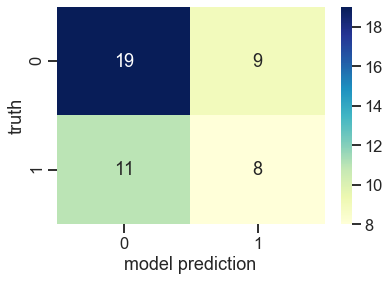

In [40]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [30]:
for i in range(len(test_labels)): 
    if not test_labels[i] == predictions[i]: 
        print(test_filenames[i])

test_bw/Caravaggio_66_bw_64x64.png
test_bw/A_Gentileschi_6_bw_64x64.png
test_bw/Caravaggio_72_bw_64x64.png
test_bw/Caravaggio_27_bw_64x64.png
test_bw/Caravaggio_4_bw_64x64.png
test_bw/Caravaggio_48_bw_64x64.png
test_bw/A_Gentileschi_10_bw_64x64.png
test_bw/Ribalta_2_bw_64x64.png
test_bw/Caravaggio_19_bw_64x64.png
test_bw/Rubens_5_bw_64x64.png
test_bw/Caravaggio_82_bw_64x64.png
test_bw/Caravaggio_77_bw_64x64.png
test_bw/Boulogne _2_bw_64x64.png
test_bw/Caravaggio_70_bw_64x64.png
test_bw/Caravaggio_30_bw_64x64.png
test_bw/Caravaggio_62_bw_64x64.png
test_bw/Titian_1_bw_64x64.png
test_bw/Caravaggio_23_bw_64x64.png
test_bw/Giorgione_9_bw_64x64.png
test_bw/Titian_7_bw_64x64.png
